In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_DF = pd.read_csv(mouse_drug_data_to_load)
Clinical_Trial_DF = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceuticals_DF = pd.merge(Mouse_DF, Clinical_Trial_DF, on="Mouse ID")
pymaceuticals_DF = pymaceuticals_DF[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]
pymaceuticals_DF_Prev = pymaceuticals_DF.sort_values(by=["Timepoint", "Metastatic Sites"])
pymaceuticals_DF_Prev.reset_index(inplace=True)
del pymaceuticals_DF_Prev["index"]

# Display the data table for preview
pymaceuticals_DF_Prev.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.0,0,Stelasyn
1,x402,0,45.0,0,Stelasyn
2,a492,0,45.0,0,Stelasyn
3,w540,0,45.0,0,Stelasyn
4,v764,0,45.0,0,Stelasyn


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Mean_Tumor_Volume = pymaceuticals_DF.groupby(["Drug","Timepoint"]).mean()
del Mean_Tumor_Volume["Metastatic Sites"]
Mean_Tumor_Volume.reset_index(inplace=True)

# Convert to DataFrame
type(Mean_Tumor_Volume)

# Preview DataFrame
Mean_Tumor_Volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
pymaceuticals_Tumor_standerr = pymaceuticals_DF.groupby(\
                        ["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
pymaceuticals_Tumor_standerr = pd.DataFrame(pymaceuticals_Tumor_standerr)
pymaceuticals_Tumor_standerr.reset_index(inplace=True)

# Preview DataFrame
pymaceuticals_Tumor_standerr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Tumor_Volume_Pivot = Mean_Tumor_Volume.pivot(index="Timepoint",
                        columns="Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
Mean_Tumor_Volume_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


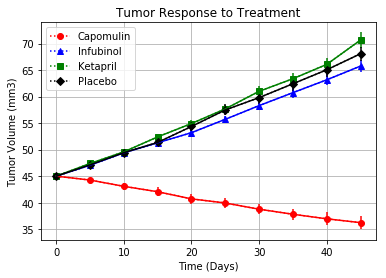

In [5]:
# Generate the Plot (with Error Bars)
MTSEM = pymaceuticals_DF.groupby(["Timepoint","Drug"]).sem().iloc[:,2]\
        .reset_index().pivot("Timepoint","Drug","Tumor Volume (mm3)")

Mean_Tumor_Volume_Pivot2 = Mean_Tumor_Volume_Pivot.reset_index()

Capomulin, = plt.plot(Mean_Tumor_Volume_Pivot2["Timepoint"],
                      Mean_Tumor_Volume_Pivot2["Capomulin"],
                      "o:", color="red", label="Capomulin")

plt.errorbar(Mean_Tumor_Volume_Pivot2["Timepoint"],
             Mean_Tumor_Volume_Pivot2["Capomulin"],
             MTSEM["Capomulin"], color="red")

Infubinol, = plt.plot(Mean_Tumor_Volume_Pivot2["Timepoint"],
                      Mean_Tumor_Volume_Pivot2["Infubinol"],
                      "^:", color="blue", label="Infubinol")

plt.errorbar(Mean_Tumor_Volume_Pivot2["Timepoint"],
             Mean_Tumor_Volume_Pivot2["Infubinol"],
             MTSEM["Infubinol"], color="blue")

Ketapril, = plt.plot(Mean_Tumor_Volume_Pivot2["Timepoint"],
                     Mean_Tumor_Volume_Pivot2["Ketapril"],
                     "s:", color="green", label="Ketapril")

plt.errorbar(Mean_Tumor_Volume_Pivot2["Timepoint"],
             Mean_Tumor_Volume_Pivot2["Ketapril"],
             MTSEM["Ketapril"], color="green")

Placebo, = plt.plot(Mean_Tumor_Volume_Pivot2["Timepoint"],
                    Mean_Tumor_Volume_Pivot2["Placebo"],
                    "D:", color="black", label="Placebo")

plt.errorbar(Mean_Tumor_Volume_Pivot2["Timepoint"],\
             Mean_Tumor_Volume_Pivot2["Placebo"], \
             MTSEM["Placebo"], color="black")

plt.grid()
#plt.xlim(0, 0)
plt.ylim(33, 74)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")

# Save the Figure
plt.savefig("Tumor Response to Treatment.png")
plt.show()

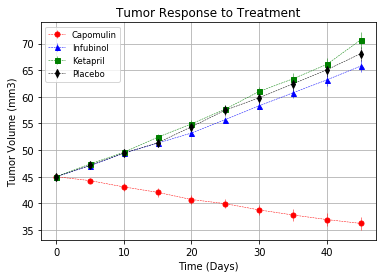

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_Met_Site = pymaceuticals_DF.groupby(["Drug","Timepoint"]).mean()
del Mean_Met_Site["Tumor Volume (mm3)"]

# Preview DataFrame
Mean_Met_Site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pymaceuticals_Met_standerr = pymaceuticals_DF.groupby(\
                    ["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
pymaceuticals_Met_standerr = pd.DataFrame(pymaceuticals_Met_standerr)

# Preview DataFrame
pymaceuticals_Met_standerr.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
Mean_Met_Site_Reindex = Mean_Met_Site.reset_index()
Mean_Met_Site_Reindex

Mean_Met_Site_Pivot = Mean_Met_Site_Reindex.pivot(index="Timepoint", \
                    columns="Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
Mean_Met_Site_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


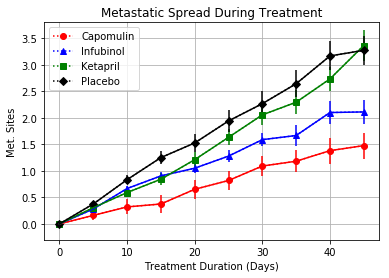

In [9]:
# Generate the Plot (with Error Bars)
MTSEM2 = pymaceuticals_DF.groupby(["Timepoint","Drug"]).sem().iloc[:,2]\
        .reset_index().pivot("Timepoint","Drug","Tumor Volume (mm3)")

MTSEM2 = MTSEM2/5

Mean_Met_Site_Pivot2 = Mean_Met_Site_Pivot.reset_index()

Capomulin_Met, = plt.plot(Mean_Met_Site_Pivot2["Timepoint"],
                          Mean_Met_Site_Pivot2["Capomulin"], 
                          "o:", color="red", label="Capomulin")

plt.errorbar(Mean_Met_Site_Pivot2["Timepoint"],
             Mean_Met_Site_Pivot2["Capomulin"],
             MTSEM2["Capomulin"], color="red")

Infubinol_Met, = plt.plot(Mean_Met_Site_Pivot2["Timepoint"],
                          Mean_Met_Site_Pivot2["Infubinol"],
                          "^:", color="blue", label="Infubinol")

plt.errorbar(Mean_Met_Site_Pivot2["Timepoint"],
             Mean_Met_Site_Pivot2["Infubinol"],
             MTSEM2["Infubinol"], color="blue")

Ketapril_Met, = plt.plot(Mean_Met_Site_Pivot2["Timepoint"],
                         Mean_Met_Site_Pivot2["Ketapril"],
                         "s:", color="green", label="Ketapril")

plt.errorbar(Mean_Met_Site_Pivot2["Timepoint"],
             Mean_Met_Site_Pivot2["Ketapril"],
             MTSEM2["Ketapril"], color="green")

Placebo_Met, = plt.plot(Mean_Met_Site_Pivot2["Timepoint"],
                        Mean_Met_Site_Pivot2["Placebo"],
                        "D:", color="black", label="Placebo")

plt.errorbar(Mean_Met_Site_Pivot2["Timepoint"],
             Mean_Met_Site_Pivot2["Placebo"],
             MTSEM2["Placebo"], color="black")

plt.grid()
#plt.xlim(0, 0)
plt.ylim(-0.3,  3.8)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")

# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()

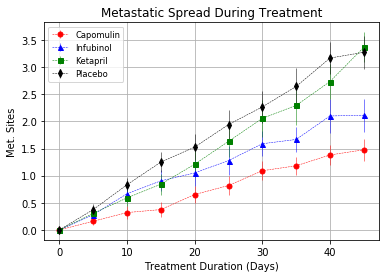

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_Count = pymaceuticals_DF.groupby(["Drug", "Timepoint"]).count()
del Mice_Count["Tumor Volume (mm3)"]
del Mice_Count["Metastatic Sites"]
Mice_Count.reset_index(inplace=True)
Mice_Count = Mice_Count.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
Mice_Count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
Mice_Count_Pivot = Mice_Count.pivot(index="Timepoint", columns="Drug", values = "Mouse Count")

# Preview the Data Frame
Mice_Count_Pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


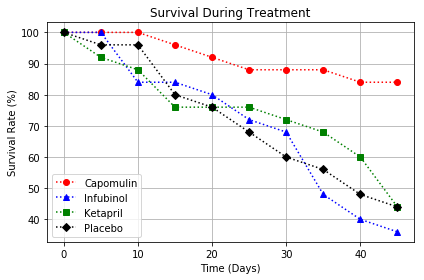

In [12]:
# Generate the Plot (with Error Bars)
Mice_Count_Pivot = Mice_Count_Pivot.div(25, axis="index")
Mice_Count_Pivot = Mice_Count_Pivot*100
Mice_Count_Pivot2 = Mice_Count_Pivot.reset_index()

Capomulin_Mice, = plt.plot(Mice_Count_Pivot2["Timepoint"],\
                      Mice_Count_Pivot2["Capomulin"], \
                      "o:", color="red", label="Capomulin")
Infubinol_Mice, = plt.plot(Mice_Count_Pivot2["Timepoint"],\
                      Mice_Count_Pivot2["Infubinol"], \
                      "^:", color="blue", label="Infubinol")
Ketapril_Mice, = plt.plot(Mice_Count_Pivot2["Timepoint"],\
                     Mice_Count_Pivot2["Ketapril"], \
                     "s:", color="green", label="Ketapril")
Placebo_Mice, = plt.plot(Mice_Count_Pivot2["Timepoint"],\
                    Mice_Count_Pivot2["Placebo"], \
                    "D:", color="black", label="Placebo")

plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo], loc="best")

# Save the Figure
plt.tight_layout()
plt.savefig("Survival During Treatment")
plt.show()

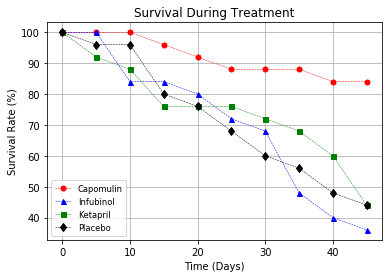

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
Mean_Tumor_Volume_Change = (Mean_Tumor_Volume_Pivot.iloc[[0]].append\
                            (Mean_Tumor_Volume_Pivot.iloc[[-1]]))\
                            .pct_change().iloc[[1]]*100

Mean_Tumor_Volume_Change = (Mean_Tumor_Volume_Change.unstack(level=0)).reset_index()
del Mean_Tumor_Volume_Change["Timepoint"]

Mean_Tumor_Volume_Change = ((Mean_Tumor_Volume_Change.set_index("Drug"))\
                            .rename(columns={0:""}))\
                            .convert_objects(convert_numeric=True)

# Display the data to confirm
print(Mean_Tumor_Volume_Change)

                    
Drug                
Capomulin -19.475303
Ceftamin   42.516492
Infubinol  46.123472
Ketapril   57.028795
Naftisol   53.923347
Placebo    51.297960
Propriva   47.241175
Ramicane  -22.320900
Stelasyn   52.085134
Zoniferol  46.579751


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

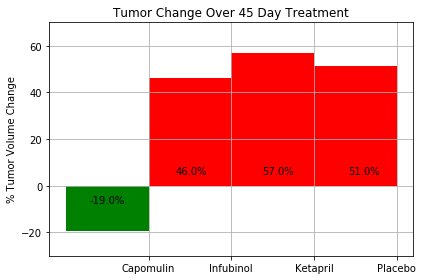

In [14]:
# Store all Relevant Percent Changes into a Tuple
bar_column_names = Mean_Tumor_Volume_Change.iloc[:6]
bar_column_names = bar_column_names.drop(bar_column_names.index[[1,4]])
bar_column_names["positive"] = bar_column_names[""] > 0
bar_column_names = bar_column_names.reset_index()

# Splice the data between passing and failing drugs
plt.bar(bar_column_names["Drug"],bar_column_names[""], align="edge", width=1, \
        color = bar_column_names.positive.map({True:"r",False:'g'}))

# Orient widths. Add labels, tick marks, etc. 
x = [1,2,3,4]
plt.ylim(-30, 70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xticks(x,bar_column_names["Drug"])
plt.ylabel("% Tumor Volume Change")
plt.grid()

# Use functions to label the percentages of changes
bar_column_names_per = bar_column_names.round(0)
plt.figtext(.215,.28, '{}%'.format(bar_column_names_per[""][0]))
plt.figtext(.415,.38, '{}%'.format(bar_column_names_per[""][1]))
plt.figtext(.615,.38, '{}%'.format(bar_column_names_per[""][2]))
plt.figtext(.815,.38, '{}%'.format(bar_column_names_per[""][3]))


# Save the Figure
plt.tight_layout()
plt.savefig("Tumor Change Over 45 Day Treatment")

# Show the Figure
plt.show()

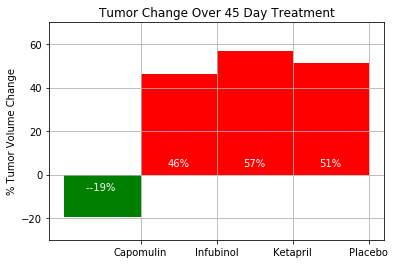